# E6691 Assignment-1   
# Spring 2021

## 1.2 & 1.3    1-dimensional Convolution and Correlation 
### Below is visualization codes provided by the instructors

In [1]:
from IPython.display import HTML
from matplotlib import animation
from matplotlib.font_manager import FontProperties

import matplotlib.pyplot as plt


def animate(i, n_conv, output_signal, conv_mask, l2, l3, l4):
    """
    animate update the data for the FuncAnimation design
    
    Args:
        i (int): number of frame visualized
        n_conv (int): length of conv_mask
        output_signal (list): list of the applied convolution
        conv_mask (list): list of the conv_mask elements
        l2 (Line2D): dataset for the visualization of conv mask
        l3 (Line2D): dataset for the output signal (points)
        l4 (Line2D): dataset for the output signal (line)
    """
    left = len(conv_mask) // 2
    right = len(conv_mask) - left - 1
    l2.set_data(range(i - left - 1, i + right), conv_mask)
    l3.set_data(range(0, i), [output_signal[x] for x in range(0, i)])
    l4.set_data(range(0, i), [output_signal[x] for x in range(0, i)])
    
def visualize_1dcond(input_signal, output_signal, conv_mask, conv=True):
    """
    visualize_1dcond creates a jshtml object to visualizes the a 1d convolution 
    with matplotlib.animation.FuncAnimation
    
    The startframe is -1 (no convolution applied)
    
    Args:
        input_signal (list): list of the input_signla elements
        output_signal (list): list of the applied convolution
        conv_mask (list): list of the conv_mask elements
    
    Returns:
        ani (jshtml): Return the animation as jshtml
    
    Todo:
        * Making parameters available to the function and not hardcoded
    """
    n_conv = len(conv_mask)
    n_input_signal = len(input_signal)
    
    # Calculate the boundaries of the plot
    min_x = -n_conv
    max_x = len(input_signal)+n_conv
    min_y = min(output_signal)-1
    max_y = min(output_signal)+1
    
    # Initialize the plot
    fontP = FontProperties()
    fontP.set_size('small')
    plt.rcParams['figure.figsize'] = [8, 4]
    fig, ax = plt.subplots(nrows=2, ncols=1)
    if conv:
        fig.suptitle('Visualization conv1d')
    else:
        fig.suptitle('Visualization correlation')
    ax[0].axis([min_x, max_x, -1, max(output_signal)+1])
    ax[0].set_ylabel('Signal')
    ax[1].axis([min_x, max_x, -1, max(output_signal)+1])
    ax[1].set_ylabel('Signal')
    ax[1].set_xlabel('Step')
    
    ## input signal
    l, = ax[0].plot(range(0, n_input_signal), input_signal, label='input')
    ## convmask
    if conv:
        l2, = ax[0].plot([0], [0], 'r', label='convmask')
    else:
        l2, = ax[0].plot([0], [0], 'r', label='corrmask')
    ax[0].legend(prop=fontP)
    ## output signal as points
    l3, = ax[1].plot([0], [0], 'bo', label='output')
    ## output signal as line
    l4, = ax[1].plot([], [], 'b')
    ax[0].xaxis.set_ticklabels([])
    ax[1].legend(prop=fontP)
    plt.subplots_adjust(hspace = 0.05)
    
    # Initialize animation
    ani = animation.FuncAnimation(fig, animate, frames=n_input_signal+1, fargs=(n_conv, output_signal, conv_mask, l2, l3, l4))
    
    # Run animation
    return(ani.to_jshtml())

## TODO: Finish These Functions (signal generator, convolution and correlation):

In [12]:
def create_rect_signal(base_ampl=0, base_length=128, function_ampl=1, function_length=12):
    # your implementation
    try:
        assert function_length <= base_length
    except AssertionError:
        raise Exception()
    signal = [function_ampl if (base_length - function_length) / 2 < i < (base_length + function_length) / 2 else base_ampl for i in range(base_length)]
    return signal

def create_1dconv_mask_sawtooth(start_ampl=1, end_ampl=8, steps=1):
    # your implementation
    # use start_ampl and end_ampl to infer the kernel_size
    signal = [i * steps for i in range(start_ampl, end_ampl)]
    return signal

def calc_conv(conv_mask, input_signal):
    # your implementation
    # multiply with the flip version of the filter
    # using 0 paddings
    # not using python built-in for flipping the filter
    conv_mask = [ conv_mask[len(conv_mask) - 1 - x] for x in range(len(conv_mask)) ]
    output = [0 for x in range(len(input_signal))]
    input_signal_padded = input_signal + [0 for x in range(len(conv_mask))]
    for i in range(len(input_signal)):
        for j in range(len(conv_mask)):
            output[i] += input_signal_padded[i + j] * conv_mask[j]
    return output

def calc_corr(corr_mask, input_signal):
    output = [0 for x in range(len(input_signal))]
    input_signal_padded = input_signal + [0 for x in range(len(conv_mask))]
    for i in range(len(input_signal)):
        for j in range(len(conv_mask)):
            output[i] += input_signal_padded[i + j] * conv_mask[j]
    return output
    


In [13]:
# Creating a rectangle signal as specified
input_signal = create_rect_signal(base_ampl = 0, 
                                  base_length = 128, 
                                  function_ampl = 1, 
                                  function_length = 12)

In [14]:
# Creating a sawtooth signal as specified
conv_mask = create_1dconv_mask_sawtooth(start_ampl = 1, end_ampl = 8, steps = 1)
corr_mask = create_1dconv_mask_sawtooth(start_ampl = 1, end_ampl = 8, steps = 1)

In [15]:
# Applying the convolution mask to the input signal
output_signal_conv = calc_conv(conv_mask, input_signal)
output_signal_corr = calc_corr(corr_mask, input_signal)

## Visualization for 1D convolution

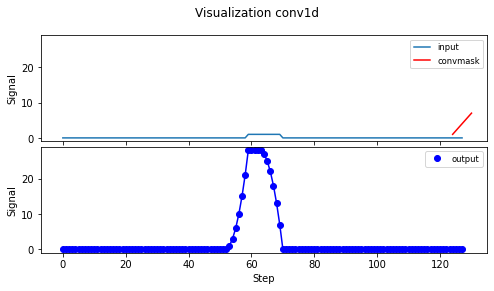

In [16]:
# Visualization
%matplotlib inline

# The start frame is (-1) - no convolution applied
HTML(visualize_1dcond(input_signal, output_signal_conv, conv_mask, conv=True))

## Visualization for 1D correlation

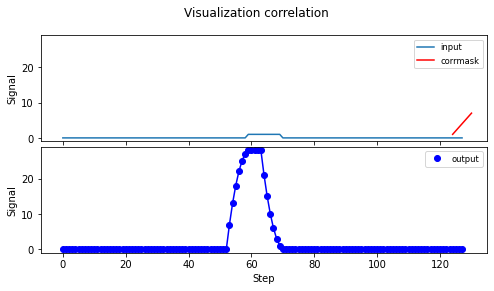

In [17]:
# Visualization
%matplotlib inline

# The start frame is (-1) - no convolution applied
HTML(visualize_1dcond(input_signal, output_signal_corr, corr_mask, conv=False))

# 1.4 Visualization for dilated Convolution(1.4), for the 32*32 resolution image, you can use MNIST or CIFAR10 dataset for convenience.

### CIFAR10 Image Loading

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = torchvision.datasets.CIFAR10(root='./data', download=True, transform=transform)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(dataloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
image = images / 2 + 0.5
image = image.numpy()
image = image[0]
image = np.transpose(image, (1, 2, 0))

## TODO: Finished These Functions (dilated_kernel generator, image padding, 2D convolution):

In [ ]:
def dilute_kernel(kernel, dilution):
    """
    Args:
        kernel (np.array): convolution kernel
        dilution (int): number of holes
    """
    # your implementation
    
    return diluted_kernel

def pad_img(image, diluted_kernel):
    # your implementation
    
    return image

def calc_conv2d(image, padded_img, diluted_kernel):
    # your implementation
    
    return conved_image

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.transform import resize
def plot_ax(fig, ax, n_row, n_col, image, title, ylabel = ''):
    """
    plots the image of a subplot
        
    Args:
        fig (figure): Figure object of the total plot
        ax (axis): Axis object
        n_row (integer): Row index, on which subaxis the image should be plotted
        n_col (integer): Col index, on which subaxis the image should be plotted
        image (np array): Image to plot
        title (str): Title of the subplot
        ylabel: Label of the Y-Axis
    """
    major_ticks = np.arange(0, image.shape[0], 1)
    minor_ticks = np.arange(0, image.shape[0], 1)
    ax[n_row, n_col].set_xticks(major_ticks)
    ax[n_row, n_col].set_xticks(minor_ticks, minor=True)
    ax[n_row, n_col].set_yticks(major_ticks)
    ax[n_row, n_col].set_yticks(minor_ticks, minor=True)
    ax[n_row, n_col].xaxis.set_ticklabels([])
    ax[n_row, n_col].yaxis.set_ticklabels([])
    #ax[n_row, n_col].grid()
    ax[n_row, n_col].set_title(title)
    ax[n_row, n_col].set_ylabel(ylabel)
    im1 = ax[n_row, n_col].imshow(image, extent=[0, image.shape[0], 0, image.shape[0]], cmap='RdBu', vmin=-8, vmax=8)
    divider = make_axes_locatable(ax[n_row, n_col])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')
    
def visualize(image, kernel, dilutions = [0]):
    """
    visualizes different diluted convolutions for an image and kernel
    
    Args:
        image (np_array): Image to plot
        kernel (np_array): Kernel values before dilution
        dilutions (list): List of how many steps applied
    """
    plt.rcParams['figure.figsize'] = [12, 12]
    fig, ax = plt.subplots(nrows = max(len(dilutions)+1,2), ncols = 3)
    plot_ax(fig, ax, 0, 0, image, 'Raw image')
    plot_ax(fig, ax, 0, 1, kernel, 'Raw kernel')
    ax[0, 2].axis('off')
    i = 1
    for dilution in dilutions:
        diluted_kernel = dilute_kernel(kernel, dilution)
        padded_img = pad_img(image, diluted_kernel)
        conved_img = calc_conv2d(image, padded_img, diluted_kernel)
        plot_ax(fig, ax, i, 0, padded_img, 'Pad images', 'Dolution: ' + str(dilution))
        plot_ax(fig, ax, i, 1, diluted_kernel, 'Diluted kernel')
        plot_ax(fig, ax, i, 2, conved_img, 'Output')
        i = i + 1

## Visualization for 2D convolution on CIFAR10 images

In [ ]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
dilutions = [1, 2, 4]
visualize(image, kernel, dilutions)